In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# first download the stackoverflow dataset from the link below
# https://insights.stackoverflow.com/survey
# after download paste the csv file into the working directory and youre good to go
# reading the data into a data frame
df = pd.read_csv('survey_results_public.csv')
# df.head()

In [3]:
# reading only those colmn which we require to build our model
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp"]]
# renaming the colmn for easy understanding
df = df.rename({"ConvertedComp":"Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [4]:
# reading only the rows where salary is not missing
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [5]:
# checking the missing values for each column
df.isnull().sum()

Country           0
EdLevel         568
YearsCodePro    135
Employment       39
Salary            0
dtype: int64

In [7]:
# finding the columns with object type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [8]:
# dropping all the rows which have null values in any cell
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
# selecting only those records where employment is full time
# that means those who are working as full will be selected only
df = df[df["Employment"] == "Employed full-time"]
# after filtering the full time employees we dont need this colmn
df = df.drop("Employment", axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [11]:
# this function will filter data according to the number of participents
# from each country with minimum count as a threshold value
def selectCountry(countries, mincount):
    countryMap = {}
    for i in range(len(countries)):
        if countries.values[i] >= mincount:
            countryMap[countries.index[i]] = countries.index[i]
        else:
            countryMap[countries.index[i]] = 'others'
    return countryMap

In [12]:
# here all the countries with less then 200 will be categoriesed as others which we will delete later
countryMap = selectCountry(df.Country.value_counts(),200)
df['Country'] = df['Country'].map(countryMap)
df.Country.value_counts()

United States         7569
others                4576
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Turkey                 327
Israel                 300
Pakistan               271
Switzerland            266
Mexico                 256
Ireland                253
Norway                 252
Ukraine                249
Romania                246
South Africa           244
Czech Republic         229
Austria                220
Belgium                219
Iran                   218
Portugal               215
Denmark                208
Name: Country, dtype: int64

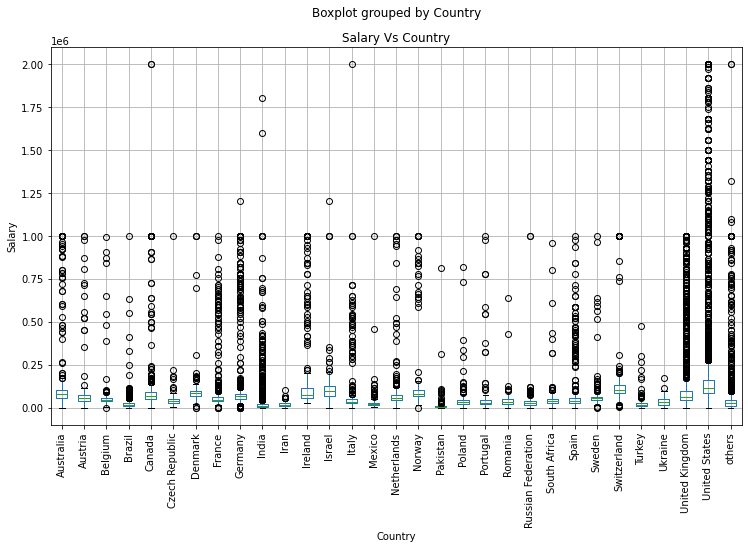

In [13]:
# now we are plotting a boxplot to understanding outliers in the salary columns
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.title('Salary Vs Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

In [14]:
# from above graph it is visible that all the outliers are roughly above 0.25 for all country
# so will remove all the data where salary is above 250000 and minimum salary as 10000 for a 
# working professional
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
# removing the records with 'other' value which we set in above column
df = df[df['Country'] != 'Other']

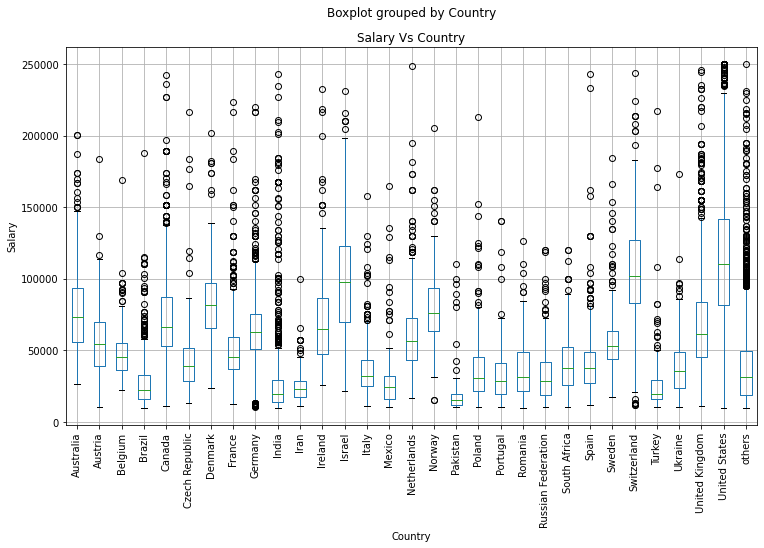

In [15]:
# this boxplot shows us the data with threshold value as 250000
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.title('Salary Vs Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

In [16]:
# printing unique values present in the YearsCodePro column
df.YearsCodePro.unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '29', '6',
       '28', '8', '23', '15', '25', '5', '9', '11', 'Less than 1 year',
       '21', '16', '18', '32', '19', '22', '38', '30', '26', '17', '27',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49', '47'],
      dtype=object)

In [17]:
# we are going to filter all the text values with float value
def selectCodingYears(value):
    if value == 'More than 50 years':
        return 50
    if value == 'Less than 1 year':
        return 0.5
    return float(value)
df['YearsCodePro'] = df['YearsCodePro'].apply(selectCodingYears)

In [18]:
# similarly we are going to find unique values in EdLevel(Education) colmn as well
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [19]:
# for ease we will replace all the education data into
# Bachlors Masters and Post Graduation degrees only
def selectEducation(degree):
    if degree == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':
        return 'Bachelor’s Degress'
    if degree == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':
        return 'Master’s Degree'
    if degree == 'Professional degree (JD, MD, etc.)' or degree == 'Other doctoral degree (Ph.D., Ed.D., etc.)':
        return 'Post Graduation'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(selectEducation)

In [20]:
df['EdLevel'].unique()

array(['Bachelor’s Degress', 'Master’s Degree', 'Less than a Bachelors',
       'Post Graduation'], dtype=object)

In [21]:
# now only Country and EdLevel are non numerical values
df.head(50)

,Country,EdLevel,YearsCodePro,Salary
7,United States,Bachelor’s Degress,13.0,116000.0
9,United Kingdom,Master’s Degree,4.0,32315.0
10,United Kingdom,Bachelor’s Degress,2.0,40070.0
11,Spain,Less than a Bachelors,7.0,14268.0
12,Netherlands,Less than a Bachelors,20.0,38916.0
13,United States,Less than a Bachelors,1.0,66000.0
16,United States,Bachelor’s Degress,3.0,79000.0
18,United States,Bachelor’s Degress,3.0,83400.0
23,Germany,Post Graduation,20.0,91883.0
25,Canada,Bachelor’s Degress,10.0,71093.0


In [22]:
# Now we'll be performing the label encoding on the 
# EdLevel and Country columns
from sklearn.preprocessing import LabelEncoder
educationEncoder = LabelEncoder()
# if fit_transform() doesnt work properly try using fit() and transform() seperately
df['EdLevel'] = educationEncoder.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 2, 1, 3])

In [23]:
countryEncoder = LabelEncoder()
# Importent Step
# if fit_transform() doesnt work properly try using fit() and transform() seperately
Fit = countryEncoder.fit(df['Country'])
df['Country'] = Fit.transform(df['Country'])
print(list(df['Country'].unique()))

[29, 28, 23, 15, 8, 4, 2, 13, 3, 7, 30, 5, 25, 20, 19, 9, 14, 12, 24, 1, 26, 18, 0, 10, 11, 16, 17, 27, 6, 21, 22]


In [25]:
# now we will split the data into input data and output data
# 'x' will contain all the input/independent variables i.e Country, EdLevel and YearsCodePro
# 'y' will contain the output/dependent variable i.e salary column
x = df.drop('Salary',axis=1)
y = df["Salary"]

In [26]:
x.head()

,Country,EdLevel,YearsCodePro
7,29,0,13.0
9,28,2,4.0
10,28,0,2.0
11,23,1,7.0
12,15,1,20.0
13,29,1,1.0
16,29,0,3.0
18,29,0,3.0
23,8,3,20.0
25,4,0,10.0


In [27]:
y.head()

7      116000.0
9       32315.0
10      40070.0
11      14268.0
12      38916.0
13      66000.0
16      79000.0
18      83400.0
23      91883.0
25      71093.0
29      38778.0
31      31764.0
32      63564.0
35      77556.0
37      97288.0
40     106000.0
41     130000.0
42     135000.0
43      55893.0
44      36753.0
45      37834.0
46      74970.0
47     125000.0
48      52000.0
50     103615.0
51      90482.0
53     160000.0
58      16488.0
63      94359.0
66     250000.0
79      94500.0
81     117000.0
88     130000.0
89      61476.0
90      57292.0
91      21620.0
92      37816.0
93      71850.0
95      75631.0
96      41568.0
97      79413.0
98      93000.0
103     40000.0
104     46044.0
105    148000.0
108    130000.0
110     65000.0
113     78800.0
115    116333.0
117    145000.0
Name: Salary, dtype: float64

In [28]:
# now we will split the data into training and testing data using train_test_split() method
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 43)

In [29]:
# since the data that we are going to predict is a continious data that is a float value which will be salary
# for that we will need a regression model

# first we will try the LinearRegressor
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(train_x,train_y.values)

LinearRegression()

In [30]:
# predicted_salary contains the output generated by our model
predicted_salary = linearModel.predict(test_x)
predicted_salary

array([129560.88003169,  67333.37650539,  42278.43302262, ...,
        69194.93653857, 143567.02949053,  64133.18589409])

In [31]:
# will find the error in the output
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_absolute_error(test_y,predicted_salary))
# from the output it is visible that we have an error of $180
# which is acceptable
error

180.24212222928756

In [46]:
# we will try another model that is Decision Tree Regressor
# this model uses a decision tree and derives the output 
# according to the input values
from sklearn.tree import DecisionTreeRegressor
decisionTreeModel = DecisionTreeRegressor(random_state = 43)
decisionTreeModel.fit(train_x,train_y)

DecisionTreeRegressor(random_state=43)

In [47]:
tree_salary = decisionTreeModel.predict(test_x)
tree_salary

array([ 82656.        ,  97437.87315634,  34849.725     , ...,
        98801.8       , 149000.        ,  23506.47457627])

In [34]:
# here also we got the same error value
error = np.sqrt(mean_absolute_error(test_y,predicted_salary))
error

180.24212222928756

In [35]:
# finally we will try another regressor i.e Random forest Regressor
# random forest uses multiple decision tree and compare their output
# and return the one which occures the max number of times
from sklearn.ensemble import RandomForestRegressor
forestModel = RandomForestRegressor(max_depth=12, random_state=0)
forestModel.fit(train_x,train_y)

RandomForestRegressor(max_depth=12, random_state=0)

In [36]:
forestSalary = forestModel.predict(test_x)
forestSalary

array([166058.43246674,  97550.49374177,  35351.66891777, ...,
        79923.83807532, 145642.97026218,  23593.74333775])

In [37]:
# similar to other two here also we got the same answer
error = np.sqrt(mean_absolute_error(test_y,predicted_salary))
error

180.24212222928756

In [38]:
# incase if we want to improve our ML model 
# we can use GridSearchCV which tries multiple values for hyper parameters and returns the best suited
from sklearn.model_selection import GridSearchCV

depth = [None, 2,4,6,8,10,12]
parameters = {'max_depth':depth}

from sklearn.tree import DecisionTreeRegressor
decisionTreeModel = DecisionTreeRegressor(random_state = 0)
gs = GridSearchCV(decisionTreeModel, parameters, scoring='neg_mean_squared_error')
gs.fit(train_x,train_y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [39]:
# here we got the max_depth of the tree 12 and random_state as 0
# we can use these values and improve our ML model
gsmodel = gs.best_estimator_
gsmodel

DecisionTreeRegressor(max_depth=12, random_state=0)

In [40]:
# sample value for trail
inputArry = np.array([['United States','Master’s Degree', 15]])
inputArry

array([['United States', 'Master’s Degree', '15']], dtype='<U15')

In [41]:
# the encoders we created above will transform our array values 
# and return us
inputArry[:,0] = countryEncoder.transform(inputArry[:,0])
inputArry[:,1] = educationEncoder.transform(inputArry[:,1])
inputArry = inputArry.astype(float)
inputArry

array([[29.,  2., 15.]])

In [48]:
# now here we are deploying our model using pickle
import pickle
modelDetails = {"model": decisionTreeModel, "countryEncoder":countryEncoder, "educationEncoder": educationEncoder}
with open('DecisionTreeRegressor.pkl', 'wb') as modelFile:
    pickle.dump(modelDetails, modelFile)

# here we are simply testing the passed model and encoder
tempRegressor = modelDetails["model"]
tempCountryEn = modelDetails["countryEncoder"]
tempEducationEn = modelDetails["educationEncoder"]

In [49]:
# the dump worked and we got our value
predictedValue = tempRegressor.predict(inputArry)
predictedValue

array([143130.22857143])

In [ ]:
# now we will create the UI using streamlit library
# for running the web Application enter the command in the cmd
# ./> streamlit run Application.py


############Thank you#################